In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
from MyTradingLib import FilePathOrigin

In [2]:
os.curdir = FilePathOrigin

In [3]:
# Taking all the data downloaded and concatening per each ticker in SP500
# dropping duplicates and sorting by time

files = os.listdir(FilePathOrigin)
data = {}
for file in files:
    parts = file.split('_')
    if len(parts) > 1:
        if parts[2][:4] == '1min':
            new_data = pd.read_csv(FilePathOrigin+file, index_col='time', usecols=['time','close', 'volume']).dropna()
            if parts[0] in data.keys():
                data[parts[0]] = pd.concat([data[parts[0]], new_data]).sort_values(by='time')
                data[parts[0]] = data[parts[0]][~data[parts[0]].index.duplicated(keep='first')]
            else:
                data[parts[0]] = new_data.sort_values(by='time')
len(data)

502

In [4]:
len(data['AMZN'])

241711

In [5]:
print(data['AAPL'].index[0])
date = dt.strptime(data['AAPL'].index[0], '%Y-%m-%d %H:%M:%S')
print(date.month)

2021-04-12 04:01:00
4


In [8]:
data['AAPL'].to_csv(FilePathOrigin+'AAPL_All.csv')

In [6]:
data['NVDA']

,close,volume
time,,
2021-04-12 04:30:00,143.348098,620.0
2021-04-12 06:16:00,143.398071,684.0
2021-04-12 06:30:00,143.110726,1300.0
2021-04-12 06:45:00,143.173192,724.0
2021-04-12 07:03:00,143.110726,1848.0
...,...,...
2021-12-17 19:56:00,279.600000,1621.0
2021-12-17 19:57:00,283.870000,23582.0
2021-12-17 19:58:00,279.610000,1752.0


In [195]:
data['NVDA'].loc['2021-12-17 19:58:30':'2021-12-17 20:00:00']

,close,volume
time,,
2021-12-17 19:59:00,279.6,1696.0
2021-12-17 20:00:00,280.0,1754.0


In [196]:
# Checking for the first and last date to use
tickers = list(data.keys())
first_date, last_date = '2021-05-03 04:01:00', '2021-12-17 20:00:00'
print(first_date, last_date)

2021-05-03 04:01:00 2021-12-17 20:00:00


In [198]:

data_closed = pd.DataFrame(data[tickers[0]].loc[first_date : last_date].close).rename(columns={'close':tickers[0]})
print('0', tickers[0])
for num, ticker in enumerate(tickers[1:502]):
    print(num+1, ticker)
    data_closed = data_closed.join(pd.DataFrame(data[ticker].close).rename(columns={'close':ticker}).loc[first_date : last_date], how='outer')

0 ANSS
1 MCK
2 ENPH
3 CE
4 ATVI
5 DD
6 LOW
7 HPE
8 RMD
9 EFX
10 KR
11 AIG
12 CVS
13 JCI
14 MKC
15 WBA
16 IPGP
17 AMZN
18 PPG
19 RL
20 ORLY
21 QRVO
22 ZTS
23 PTC
24 GOOG
25 WY
26 ESS
27 REG
28 URI
29 QCOM
30 JNJ
31 VRTX
32 AMT
33 RF
34 RSG
35 TMO
36 PH
37 MCD
38 CL
39 EQR
40 EXPD
41 LMT
42 ALK
43 A
44 MSFT
45 AAPL
46 GOOGL
47 TSLA
48 FB
49 NVDA
50 JPM
51 V
52 UNH
53 HD
54 WMT
55 PG
56 BAC
57 MA
58 ADBE
59 PFE
60 ORCL
61 DIS
62 NFLX
63 NKE
64 XOM
65 CRM
66 AVGO
67 CSCO
68 COST
69 KO
70 ACN
71 ABT
72 PEP
73 LLY
74 CVX
75 DHR
76 ABBV
77 PYPL
78 CMCSA
79 VZ
80 INTC
81 WFC
82 INTU
83 MRK
84 UPS
85 TXN
86 NEE
87 MS
88 LIN
89 AMD
90 T
91 UNP
92 SCHW
93 MDT
94 HON
95 TMUS
96 BLK
97 PM
98 AMAT
99 SBUX
100 GS
101 EL
102 AXP
103 NOW
104 RTX
105 BMY
106 ISRG
107 BA
108 C
109 AMGN
110 PLD
111 SPGI
112 TGT
113 IBM
114 DE
115 CAT
116 CHTR
117 GE
118 ANTM
119 MRNA
120 MMM
121 ADP
122 LRCX
123 SYK
124 COP
125 ADI
126 MU
127 BKNG
128 GM
129 SHW
130 TJX
131 GILD
132 MDLZ
133 MMC
134 F
135 USB
136 PNC
137 

In [199]:
data_closed

,ANSS,MCK,ENPH,CE,ATVI,DD,LOW,HPE,RMD,EFX,KR,AIG,CVS,JCI,MKC,WBA,IPGP,AMZN,PPG,RL,ORLY,QRVO,ZTS,PTC,GOOG,WY,ESS,REG,URI,QCOM,JNJ,VRTX,AMT,RF,RSG,TMO,PH,MCD,CL,EQR,EXPD,LMT,ALK,A,MSFT,AAPL,GOOGL,TSLA,FB,NVDA,JPM,V,UNH,HD,WMT,PG,BAC,MA,ADBE,PFE,ORCL,DIS,NFLX,NKE,XOM,CRM,AVGO,CSCO,COST,KO,ACN,ABT,PEP,LLY,CVX,DHR,ABBV,PYPL,CMCSA,VZ,INTC,WFC,INTU,MRK,UPS,TXN,NEE,MS,LIN,AMD,T,UNP,SCHW,MDT,HON,TMUS,BLK,PM,AMAT,SBUX,GS,EL,AXP,NOW,RTX,BMY,ISRG,BA,C,AMGN,PLD,SPGI,TGT,IBM,DE,CAT,CHTR,GE,ANTM,MRNA,MMM,ADP,LRCX,SYK,COP,ADI,MU,BKNG,GM,SHW,TJX,GILD,MDLZ,MMC,F,USB,PNC,CCI,MO,CB,CME,CSX,TFC,DUK,ICE,ITW,EW,HCA,MCO,REGN,EQIX,CI,NSC,BDX,SO,WM,FISV,ETN,ECL,FDX,APD,AON,COF,FIS,KLAC,D,PSA,NXPI,NOC,HUM,ADSK,BSX,ILMN,GD,FCX,PGR,SNPS,EMR,DXCM,FTNT,XLNX,INFO,EXC,ALGN,EOG,MAR,TEL,IDXX,MSCI,IQV,DG,CDNS,MET,APH,SPG,ROP,CMG,MCHP,TT,CARR,DLR,CTAS,MNST,BK,KMB,CNC,APTV,PXD,PAYX,MSI,NEM,TROW,STZ,SLB,CTSH,LHX,HPQ,EBAY,KHC,AEP,AZO,SIVB,ODFL,HLT,ROK,SRE,BAX,PRU,DOW,ANET,ROST,YUM,GIS,MPC,DHI,SBAC,HSY,AFL,TRV,O,SYY,IFF,FRC,MTCH,FAST,KEYS,KMI,OTIS,VRSK,MTD,GPN,TWTR,WELL,XEL,EA,ADM,CPRT,LEN,AJG,CTVA,CBRE,NDAQ,DFS,AVB,STT,BIIB,TDG,AMP,AME,ARE,ZBRA,WMB,NUE,PEG,GLW,AWK,WST,DLTR,PSX,SWK,CMI,ALL,PCAR,ALB,TSN,BLL,ES,LYB,FITB,VFC,WEC,DVN,ED,WLTW,VLO,LVS,OXY,ETSY,EXR,OKE,LH,MLM,VMC,VRSN,KSU,FTV,SWKS,TSCO,IT,GWW,CDW,SYF,GRMN,TER,ZBH,ABC,EIX,EXPE,PAYC,LYV,BBY,HRL,MAA,LUV,DOV,NTRS,HES,DAL,IR,KMX,CHD,PKI,DRE,MPWR,HIG,STX,STE,POOL,DTE,CCL,AEE,BIO,XYL,BKR,HBAN,GNRC,CERN,ULTA,TRMB,ETR,FE,PPL,KEY,HAL,K,TYL,CTLT,JBHT,WAT,BR,CLX,NVR,VIAC,FOXA,FOX,TDY,CFG,FANG,RJF,NTAP,BBWI,DRI,COO,DGX,MTB,DPZ,MGM,VTR,RCL,GPC,TTWO,PFG,CZR,BRO,HOLX,CINF,J,AKAM,TECH,PEAK,CMS,FLT,CRL,UDR,WDC,IEX,BXP,AMCR,IP,AVY,CNP,BEN,CTRA,DISH,WAB,LKQ,MAS,TXT,PWR,AES,EMN,CDAY,ROL,CAG,VTRS,EVRG,OMC,TFX,AAP,LNT,MKTX,IPG,L,INCY,SJM,FBHS,WRB,UAL,PHM,KIM,NLOK,CBOE,FFIV,IRM,WHR,ABMD,HAS,FMC,CAH,CHRW,MOS,AOS,HWM,CF,CPB,NWS,NWSA,ATO,MRO,PNR,LUMN,LDOS,RHI,LNC,PKG,MHK,TPR,ALLE,JKHY,SNA,AAL,XRAY,DISCK,DISCA,WRK,CMA,JNPR,BWA,DVA,IVZ,RE,HSIC,UA,UAA,UHS,NI,CTXS,FRT,WYNN,TAP,ZION,APA,SEE,NRG,NWL,GL,NCLH,AIZ,LW,PENN,VNO,DXC,PBCT,PNW,HII,NLSN,WU,OGN,PVH,GPS,HBI,LEG
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-03 04:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3480.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.378331,NaN,NaN,NaN,NaN,NaN,NaN,131.418060,NaN,708.51,NaN,150.864066,NaN,NaN,NaN,NaN,NaN,NaN,40.363927,NaN,NaN,37.861517,NaN,186.80,513.95,NaN,55.076676,NaN,NaN,NaN,NaN,53.015350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.602442,NaN,44.735368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.38529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.19,NaN,NaN,NaN,NaN,NaN,11.481302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.146386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.531311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.221861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.408648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [200]:
data_closed = data_closed.fillna(method='ffill').fillna(method='bfill')
data_closed

,ANSS,MCK,ENPH,CE,ATVI,DD,LOW,HPE,RMD,EFX,KR,AIG,CVS,JCI,MKC,WBA,IPGP,AMZN,PPG,RL,ORLY,QRVO,ZTS,PTC,GOOG,WY,ESS,REG,URI,QCOM,JNJ,VRTX,AMT,RF,RSG,TMO,PH,MCD,CL,EQR,EXPD,LMT,ALK,A,MSFT,AAPL,GOOGL,TSLA,FB,NVDA,JPM,V,UNH,HD,WMT,PG,BAC,MA,ADBE,PFE,ORCL,DIS,NFLX,NKE,XOM,CRM,AVGO,CSCO,COST,KO,ACN,ABT,PEP,LLY,CVX,DHR,ABBV,PYPL,CMCSA,VZ,INTC,WFC,INTU,MRK,UPS,TXN,NEE,MS,LIN,AMD,T,UNP,SCHW,MDT,HON,TMUS,BLK,PM,AMAT,SBUX,GS,EL,AXP,NOW,RTX,BMY,ISRG,BA,C,AMGN,PLD,SPGI,TGT,IBM,DE,CAT,CHTR,GE,ANTM,MRNA,MMM,ADP,LRCX,SYK,COP,ADI,MU,BKNG,GM,SHW,TJX,GILD,MDLZ,MMC,F,USB,PNC,CCI,MO,CB,CME,CSX,TFC,DUK,ICE,ITW,EW,HCA,MCO,REGN,EQIX,CI,NSC,BDX,SO,WM,FISV,ETN,ECL,FDX,APD,AON,COF,FIS,KLAC,D,PSA,NXPI,NOC,HUM,ADSK,BSX,ILMN,GD,FCX,PGR,SNPS,EMR,DXCM,FTNT,XLNX,INFO,EXC,ALGN,EOG,MAR,TEL,IDXX,MSCI,IQV,DG,CDNS,MET,APH,SPG,ROP,CMG,MCHP,TT,CARR,DLR,CTAS,MNST,BK,KMB,CNC,APTV,PXD,PAYX,MSI,NEM,TROW,STZ,SLB,CTSH,LHX,HPQ,EBAY,KHC,AEP,AZO,SIVB,ODFL,HLT,ROK,SRE,BAX,PRU,DOW,ANET,ROST,YUM,GIS,MPC,DHI,SBAC,HSY,AFL,TRV,O,SYY,IFF,FRC,MTCH,FAST,KEYS,KMI,OTIS,VRSK,MTD,GPN,TWTR,WELL,XEL,EA,ADM,CPRT,LEN,AJG,CTVA,CBRE,NDAQ,DFS,AVB,STT,BIIB,TDG,AMP,AME,ARE,ZBRA,WMB,NUE,PEG,GLW,AWK,WST,DLTR,PSX,SWK,CMI,ALL,PCAR,ALB,TSN,BLL,ES,LYB,FITB,VFC,WEC,DVN,ED,WLTW,VLO,LVS,OXY,ETSY,EXR,OKE,LH,MLM,VMC,VRSN,KSU,FTV,SWKS,TSCO,IT,GWW,CDW,SYF,GRMN,TER,ZBH,ABC,EIX,EXPE,PAYC,LYV,BBY,HRL,MAA,LUV,DOV,NTRS,HES,DAL,IR,KMX,CHD,PKI,DRE,MPWR,HIG,STX,STE,POOL,DTE,CCL,AEE,BIO,XYL,BKR,HBAN,GNRC,CERN,ULTA,TRMB,ETR,FE,PPL,KEY,HAL,K,TYL,CTLT,JBHT,WAT,BR,CLX,NVR,VIAC,FOXA,FOX,TDY,CFG,FANG,RJF,NTAP,BBWI,DRI,COO,DGX,MTB,DPZ,MGM,VTR,RCL,GPC,TTWO,PFG,CZR,BRO,HOLX,CINF,J,AKAM,TECH,PEAK,CMS,FLT,CRL,UDR,WDC,IEX,BXP,AMCR,IP,AVY,CNP,BEN,CTRA,DISH,WAB,LKQ,MAS,TXT,PWR,AES,EMN,CDAY,ROL,CAG,VTRS,EVRG,OMC,TFX,AAP,LNT,MKTX,IPG,L,INCY,SJM,FBHS,WRB,UAL,PHM,KIM,NLOK,CBOE,FFIV,IRM,WHR,ABMD,HAS,FMC,CAH,CHRW,MOS,AOS,HWM,CF,CPB,NWS,NWSA,ATO,MRO,PNR,LUMN,LDOS,RHI,LNC,PKG,MHK,TPR,ALLE,JKHY,SNA,AAL,XRAY,DISCK,DISCA,WRK,CMA,JNPR,BWA,DVA,IVZ,RE,HSIC,UA,UAA,UHS,NI,CTXS,FRT,WYNN,TAP,ZION,APA,SEE,NRG,NWL,GL,NCLH,AIZ,LW,PENN,VNO,DXC,PBCT,PNW,HII,NLSN,WU,OGN,PVH,GPS,HBI,LEG
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-03 04:01:00,369.54,188.622179,140.75,157.106477,91.93,77.105301,195.985997,15.643678,188.828648,229.443929,36.064904,47.940628,75.911039,61.482367,89.545079,51.783691,217.95,3480.0500,170.881821,133.030052,554.795,188.79,174.327028,131.865,2415.56,38.307378,286.674492,62.46524,325.32,137.679601,160.755457,216.25,250.411951,21.497195,106.181394,472.325798,312.884125,233.111314,80.378331,73.437861,109.708142,373.441451,70.00,133.705235,251.493431,131.418060,2362.0000,708.51,326.0,150.864066,152.856775,233.814434,396.604721,320.307506,138.502701,132.155608,40.363927,383.766178,510.75,37.861517,75.320698,186.80,513.95,132.397414,55.076676,230.50,450.039145,50.296876,370.792943,53.015350,291.356134,119.680521,141.728432,181.867809,99.367261,254.625463,109.573836,265.00,55.662561,56.602442,56.828564,44.735368,413.322793,69.463329,201.662878,179.908315,76.359269,82.029336,285.676155,81.9000,30.38529,220.777621,70.493252,129.912937,221.21987,132.69,810.687842,91.830471,132.284818,113.361297,346.301067,314.716908,153.246216,509.4999,82.616413,61.533677,291.833333,235.50,70.54382,235.076953,114.81078,388.865432,205.643875,131.542026,368.792289,227.461535,676.81,105.105474,378.907015,180.54,192.980192,186.632426,623.785675,263.740275,50.389556,152.449089,86.528095,2500.0,57.19,275.701188,70.573979,61.695058,60.3357,135.186931,11.481302,59.107313,185.375367,185.018537,45.366315,170.5

In [201]:
normalized = data_closed/data_closed.iloc[0]
normalized = normalized.loc[:, normalized.iloc[-1] >1.1]
normalized

,MCK,ENPH,LOW,RMD,EFX,KR,AIG,CVS,JCI,ORLY,ZTS,GOOG,ESS,REG,QCOM,AMT,RSG,TMO,MCD,EQR,EXPD,A,MSFT,AAPL,GOOGL,TSLA,NVDA,UNH,HD,PG,PFE,ORCL,NFLX,NKE,AVGO,CSCO,COST,ACN,ABT,PEP,LLY,CVX,DHR,ABBV,INTU,NEE,MS,LIN,AMD,UNP,SCHW,BLK,AMAT,GS,NOW,ISRG,PLD,SPGI,ANTM,MRNA,ADP,COP,ADI,SHW,GILD,MMC,F,CB,CME,ICE,EW,HCA,MCO,REGN,EQIX,WM,ETN,AON,KLAC,PSA,NXPI,SNPS,DXCM,FTNT,XLNX,INFO,EXC,EOG,TEL,IDXX,MSCI,IQV,CDNS,APH,SPG,CMG,MCHP,TT,CARR,DLR,CTAS,BK,CNC,PXD,PAYX,MSI,TROW,EBAY,AZO,SIVB,ODFL,ROK,ANET,YUM,GIS,MPC,SBAC,HSY,FAST,KEYS,VRSK,MTD,WELL,CPRT,AJG,CBRE,NDAQ,AVB,STT,AMP,ARE,ZBRA,NUE,AWK,WST,DLTR,ALB,TSN,DVN,ED,ETSY,EXR,OKE,LH,MLM,VMC,VRSN,TSCO,IT,GWW,TER,EIX,LYV,MAA,DOV,IR,CHD,PKI,DRE,MPWR,STX,POOL,BIO,BKR,GNRC,CERN,ULTA,TYL,CTLT,JBHT,WAT,BR,NVR,FANG,RJF,NTAP,BBWI,DGX,DPZ,PFG,BRO,HOLX,TECH,UDR,CNP,BEN,WAB,LKQ,TXT,PWR,AAP,IPG,KIM,NLOK,CBOE,FFIV,IRM,MOS,AOS,CF,MRO,RHI,CMA,JNPR,FRT,ZION,APA
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-03 04:01:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-05-03 04:02:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.999280,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.00

<AxesSubplot:xlabel='time'>

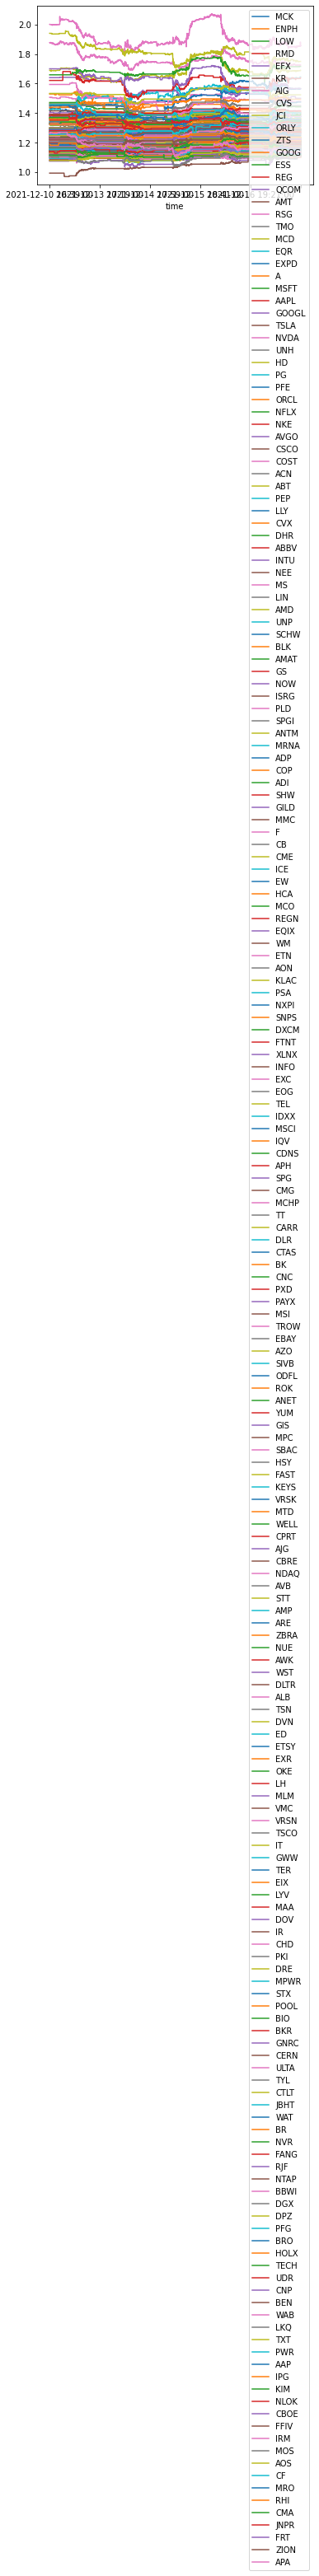

In [177]:
normalized.iloc[-5000:].plot()

In [176]:
normalized.loc[:,(normalized.corr() > 0.95).astype(int).sum()>3]

,LOW,EFX,JCI,ZTS,GOOG,ESS,RSG,TMO,EQR,MSFT,GOOGL,NVDA,COST,ACN,PEP,DHR,INTU,NEE,AMD,NOW,PLD,SPGI,COP,MMC,WM,SNPS,DXCM,FTNT,XLNX,INFO,EXC,MSCI,CDNS,APH,CTAS,BK,PXD,MSI,ODFL,ROK,KEYS,VRSK,NDAQ,AVB,WST,ALB,DVN,EXR,OKE,TSCO,IT,MAA,PKI,MPWR,BIO,FANG,BRO,UDR,FFIV,MRO,RHI
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-03 04:01:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-05-03 04:02:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-05-03 04:03:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-05-03 04:04:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-05-03 04:05:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17 19:56:00,1.265856,1.205698,1.253205,1.344083,1.182359,1.192154,1.271221,1.378434,1.193526,1.288900,1.200042,1.853324,1.479748,1.359848,1.187482,1.230867,1.500691,1.186496,1.688156,1.205103,1.403875,1.202575,1.365362,1.245313,1.186208,1.406222,1.442966,1.634250,1.566508,1.218699,1.223068,1.211522,1.349529,1.217541,1.270818,1.155418,1.156507,1.388641,1.32223,1.297647,1.369627,1.184567,1.259828,1.292449,1.35737,1.376344,1.750139,1.494061,1.133135,1.200759,1.524143,1.415245,1.451265,1.402084,1.208286,1.274625,1.249226,1.272402,1.287293,1.356516,1.235376
2021-12-17 19:57:0

In [183]:
returns = data_closed/data_closed.shift(1) - 1
returns = returns.iloc[1:]
returns

,ANSS,MCK,ENPH,CE,ATVI,DD,LOW,HPE,RMD,EFX,KR,AIG,CVS,JCI,MKC,WBA,IPGP,AMZN,PPG,RL,ORLY,QRVO,ZTS,PTC,GOOG,WY,ESS,REG,URI,QCOM,JNJ,VRTX,AMT,RF,RSG,TMO,PH,MCD,CL,EQR,EXPD,LMT,ALK,A,MSFT,AAPL,GOOGL,TSLA,FB,NVDA,JPM,V,UNH,HD,WMT,PG,BAC,MA,ADBE,PFE,ORCL,DIS,NFLX,NKE,XOM,CRM,AVGO,CSCO,COST,KO,ACN,ABT,PEP,LLY,CVX,DHR,ABBV,PYPL,CMCSA,VZ,INTC,WFC,INTU,MRK,UPS,TXN,NEE,MS,LIN,AMD,T,UNP,SCHW,MDT,HON,TMUS,BLK,PM,AMAT,SBUX,GS,EL,AXP,NOW,RTX,BMY,ISRG,BA,C,AMGN,PLD,SPGI,TGT,IBM,DE,CAT,CHTR,GE,ANTM,MRNA,MMM,ADP,LRCX,SYK,COP,ADI,MU,BKNG,GM,SHW,TJX,GILD,MDLZ,MMC,F,USB,PNC,CCI,MO,CB,CME,CSX,TFC,DUK,ICE,ITW,EW,HCA,MCO,REGN,EQIX,CI,NSC,BDX,SO,WM,FISV,ETN,ECL,FDX,APD,AON,COF,FIS,KLAC,D,PSA,NXPI,NOC,HUM,ADSK,BSX,ILMN,GD,FCX,PGR,SNPS,EMR,DXCM,FTNT,XLNX,INFO,EXC,ALGN,EOG,MAR,TEL,IDXX,MSCI,IQV,DG,CDNS,MET,APH,SPG,ROP,CMG,MCHP,TT,CARR,DLR,CTAS,MNST,BK,KMB,CNC,APTV,PXD,PAYX,MSI,NEM,TROW,STZ,SLB,CTSH,LHX,HPQ,EBAY,KHC,AEP,AZO,SIVB,ODFL,HLT,ROK,SRE,BAX,PRU,DOW,ANET,ROST,YUM,GIS,MPC,DHI,SBAC,HSY,AFL,TRV,O,SYY,IFF,FRC,MTCH,FAST,KEYS,KMI,OTIS,VRSK,MTD,GPN,TWTR,WELL,XEL,EA,ADM,CPRT,LEN,AJG,CTVA,CBRE,NDAQ,DFS,AVB,STT,BIIB,TDG,AMP,AME,ARE,ZBRA,WMB,NUE,PEG,GLW,AWK,WST,DLTR,PSX,SWK,CMI,ALL,PCAR,ALB,TSN,BLL,ES,LYB,FITB,VFC,WEC,DVN,ED,WLTW,VLO,LVS,OXY,ETSY,EXR,OKE,LH,MLM,VMC,VRSN,KSU,FTV,SWKS,TSCO,IT,GWW,CDW,SYF,GRMN,TER,ZBH,ABC,EIX,EXPE,PAYC,LYV,BBY,HRL,MAA,LUV,DOV,NTRS,HES,DAL,IR,KMX,CHD,PKI,DRE,MPWR,HIG,STX,STE,POOL,DTE,CCL,AEE,BIO,XYL,BKR,HBAN,GNRC,CERN,ULTA,TRMB,ETR,FE,PPL,KEY,HAL,K,TYL,CTLT,JBHT,WAT,BR,CLX,NVR,VIAC,FOXA,FOX,TDY,CFG,FANG,RJF,NTAP,BBWI,DRI,COO,DGX,MTB,DPZ,MGM,VTR,RCL,GPC,TTWO,PFG,CZR,BRO,HOLX,CINF,J,AKAM,TECH,PEAK,CMS,FLT,CRL,UDR,WDC,IEX,BXP,AMCR,IP,AVY,CNP,BEN,CTRA,DISH,WAB,LKQ,MAS,TXT,PWR,AES,EMN,CDAY,ROL,CAG,VTRS,EVRG,OMC,TFX,AAP,LNT,MKTX,IPG,L,INCY,SJM,FBHS,WRB,UAL,PHM,KIM,NLOK,CBOE,FFIV,IRM,WHR,ABMD,HAS,FMC,CAH,CHRW,MOS,AOS,HWM,CF,CPB,NWS,NWSA,ATO,MRO,PNR,LUMN,LDOS,RHI,LNC,PKG,MHK,TPR,ALLE,JKHY,SNA,AAL,XRAY,DISCK,DISCA,WRK,CMA,JNPR,BWA,DVA,IVZ,RE,HSIC,UA,UAA,UHS,NI,CTXS,FRT,WYNN,TAP,ZION,APA,SEE,NRG,NWL,GL,NCLH,AIZ,LW,PENN,VNO,DXC,PBCT,PNW,HII,NLSN,WU,OGN,PVH,GPS,HBI,LEG
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-03 04:02:00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.000720,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.00129,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001868,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [185]:
rcorr = returns.corr()
rcorr

,ANSS,MCK,ENPH,CE,ATVI,DD,LOW,HPE,RMD,EFX,KR,AIG,CVS,JCI,MKC,WBA,IPGP,AMZN,PPG,RL,ORLY,QRVO,ZTS,PTC,GOOG,WY,ESS,REG,URI,QCOM,JNJ,VRTX,AMT,RF,RSG,TMO,PH,MCD,CL,EQR,EXPD,LMT,ALK,A,MSFT,AAPL,GOOGL,TSLA,FB,NVDA,JPM,V,UNH,HD,WMT,PG,BAC,MA,ADBE,PFE,ORCL,DIS,NFLX,NKE,XOM,CRM,AVGO,CSCO,COST,KO,ACN,ABT,PEP,LLY,CVX,DHR,ABBV,PYPL,CMCSA,VZ,INTC,WFC,INTU,MRK,UPS,TXN,NEE,MS,LIN,AMD,T,UNP,SCHW,MDT,HON,TMUS,BLK,PM,AMAT,SBUX,GS,EL,AXP,NOW,RTX,BMY,ISRG,BA,C,AMGN,PLD,SPGI,TGT,IBM,DE,CAT,CHTR,GE,ANTM,MRNA,MMM,ADP,LRCX,SYK,COP,ADI,MU,BKNG,GM,SHW,TJX,GILD,MDLZ,MMC,F,USB,PNC,CCI,MO,CB,CME,CSX,TFC,DUK,ICE,ITW,EW,HCA,MCO,REGN,EQIX,CI,NSC,BDX,SO,WM,FISV,ETN,ECL,FDX,APD,AON,COF,FIS,KLAC,D,PSA,NXPI,NOC,HUM,ADSK,BSX,ILMN,GD,FCX,PGR,SNPS,EMR,DXCM,FTNT,XLNX,INFO,EXC,ALGN,EOG,MAR,TEL,IDXX,MSCI,IQV,DG,CDNS,MET,APH,SPG,ROP,CMG,MCHP,TT,CARR,DLR,CTAS,MNST,BK,KMB,CNC,APTV,PXD,PAYX,MSI,NEM,TROW,STZ,SLB,CTSH,LHX,HPQ,EBAY,KHC,AEP,AZO,SIVB,ODFL,HLT,ROK,SRE,BAX,PRU,DOW,ANET,ROST,YUM,GIS,MPC,DHI,SBAC,HSY,AFL,TRV,O,SYY,IFF,FRC,MTCH,FAST,KEYS,KMI,OTIS,VRSK,MTD,GPN,TWTR,WELL,XEL,EA,ADM,CPRT,LEN,AJG,CTVA,CBRE,NDAQ,DFS,AVB,STT,BIIB,TDG,AMP,AME,ARE,ZBRA,WMB,NUE,PEG,GLW,AWK,WST,DLTR,PSX,SWK,CMI,ALL,PCAR,ALB,TSN,BLL,ES,LYB,FITB,VFC,WEC,DVN,ED,WLTW,VLO,LVS,OXY,ETSY,EXR,OKE,LH,MLM,VMC,VRSN,KSU,FTV,SWKS,TSCO,IT,GWW,CDW,SYF,GRMN,TER,ZBH,ABC,EIX,EXPE,PAYC,LYV,BBY,HRL,MAA,LUV,DOV,NTRS,HES,DAL,IR,KMX,CHD,PKI,DRE,MPWR,HIG,STX,STE,POOL,DTE,CCL,AEE,BIO,XYL,BKR,HBAN,GNRC,CERN,ULTA,TRMB,ETR,FE,PPL,KEY,HAL,K,TYL,CTLT,JBHT,WAT,BR,CLX,NVR,VIAC,FOXA,FOX,TDY,CFG,FANG,RJF,NTAP,BBWI,DRI,COO,DGX,MTB,DPZ,MGM,VTR,RCL,GPC,TTWO,PFG,CZR,BRO,HOLX,CINF,J,AKAM,TECH,PEAK,CMS,FLT,CRL,UDR,WDC,IEX,BXP,AMCR,IP,AVY,CNP,BEN,CTRA,DISH,WAB,LKQ,MAS,TXT,PWR,AES,EMN,CDAY,ROL,CAG,VTRS,EVRG,OMC,TFX,AAP,LNT,MKTX,IPG,L,INCY,SJM,FBHS,WRB,UAL,PHM,KIM,NLOK,CBOE,FFIV,IRM,WHR,ABMD,HAS,FMC,CAH,CHRW,MOS,AOS,HWM,CF,CPB,NWS,NWSA,ATO,MRO,PNR,LUMN,LDOS,RHI,LNC,PKG,MHK,TPR,ALLE,JKHY,SNA,AAL,XRAY,DISCK,DISCA,WRK,CMA,JNPR,BWA,DVA,IVZ,RE,HSIC,UA,UAA,UHS,NI,CTXS,FRT,WYNN,TAP,ZION,APA,SEE,NRG,NWL,GL,NCLH,AIZ,LW,PENN,VNO,DXC,PBCT,PNW,HII,NLSN,WU,OGN,PVH,GPS,HBI,LEG
ANSS,1.000000,0.048675,0.135859,0.049922,0.063510,0.041075,0.063169,0.026900,0.143953,0.107446,-0.011325,0.019361,0.009262,0.017557,0.024200,0.010145,0.143442,0.146071,0.056212,0.044475,0.054694,0.116295,0.130411,0.206517,0.144174,0.043802,0.077434,0.043553,0.057916,0.117393,0.024922,0.060507,0.031276,0.017255,0.087221,0.122229,0.062137,0.068143,0.027565,0.068785,0.070921,0.004871,0.028557,0.132486,0.150112,0.134084,0.135116,0.107308,0.123860,0.145127,0.019327,0.098676,0.038248,0.066994,0.051057,0.028194,0.007786,0.130356,0.188206,0.015272,0.075328,0.091211,0.131008,0.096394,0.018706,0.167131,0.056695,0.059387,0.085031,0.030448,0.151060,0.092714,0.028566,0.038692,0.015709,0.106347,0.032303,0.139676,0.037373,-0.000435,0.088907,0.008680,0.216738,0.019840,0.031703,0.129541,0.053166,0.032975,0.067233,0.140146,-0.003537,0.047932,0.051599,0.026546,0.044330,0.074208,0.085379,0.000195,0.114751,0.092437,0.036315,0.098348,0.045471,0.234593,0.038134,0.040590,0.156134,0.054739,0.012375,0.041065,0.082300,0.120916,0.053038,0.031304,0.033391,0.025604,0.073761,0.011805,0.052093,0.076289,0.019544,0.092953,0.135406,0.117932,0.017355,0.129700,0.098647,0.098381,0.043422,0.081331,0.055881,0.018608,0.025047,0.138324,0.027192,0.002764,0.026198,0.071003,0.006083,0.022723,0.022146,0.022213,-0.009889,-0.013775,0.136467,0.061798,0.101195,0.060380,0.158723,0.068817,0.086486,0.050563,0.073855,0.067243,0.011071,0.059779,0.094247,0.082806,0.091840,0.063488,0.067074,0.074228,0.021667,0.074975,0.155699,-0.002214,0.062913,0.142476,0.010657,0.048883,0.195981,0.086700,0.152234,0.044322,0.063273,0.035975,0.287260,0.047033,0.175252,0.198023,0.149491,0.147799,0.028195,0.162181,0.018297,0.070902,0.147251,0.182076,0.152297,0.144489,0.063120,0.271711,0.006373,0.146780,0.029522,0.094115,0.111344,0.149157,0.101328,0.058691,0.050653,0.169258,0.104801,0.015853,-0.019601,0.019081,0.108802,0.011055,0.110304,0.130709,0.02253